<a href="https://colab.research.google.com/github/amitmeel/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/2_Classificaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape, data.target.shape

((569, 30), (569,))

In [8]:
data.feature_names, data.target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [11]:
N, D = X_train.shape

In [12]:
from sklearn.preprocessing import StandardScaler

sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
import tensorflow as tf

In [16]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
        )

# fit the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# evaluate the model  , it will return loss and accuracy
print(f'train score : {model.evaluate(X_train, y_train)}')
print(f'test score : {model.evaluate(X_test, y_test)}')


Epoch 1/100
13/13 [==============================] - 2s 51ms/step - loss: 0.4889 - accuracy: 0.7889 - val_loss: 0.5146 - val_accuracy: 0.7836
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 0.4410 - accuracy: 0.8317 - val_loss: 0.4760 - val_accuracy: 0.8129
Epoch 3/100
13/13 [==============================] - 0s 16ms/step - loss: 0.4016 - accuracy: 0.8492 - val_loss: 0.4437 - val_accuracy: 0.8246
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.3690 - accuracy: 0.8744 - val_loss: 0.4168 - val_accuracy: 0.8480
Epoch 5/100
13/13 [==============================] - 0s 28ms/step - loss: 0.3416 - accuracy: 0.8945 - val_loss: 0.3946 - val_accuracy: 0.8480
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - loss: 0.3183 - accuracy: 0.9020 - val_loss: 0.3751 - val_accuracy: 0.8596
Epoch 7/100
13/13 [==============================] - 0s 15ms/step - loss: 0.2978 - accuracy: 0.9070 - val_loss: 0.3588 - val_accuracy: 0.8655
Epoch 

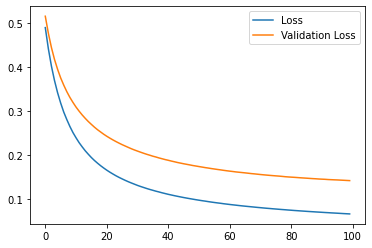

In [17]:
# loss curve
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()

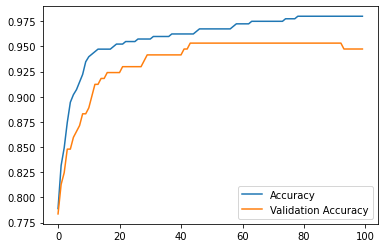

In [20]:
# accuracy curve
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()